In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.constants import h, mu_0
from scipy.integrate import cumtrapz
from scipy.optimize import curve_fit
from uncertainties import ufloat, unumpy
from uncertainties.unumpy import nominal_values as noms
from uncertainties.unumpy import std_devs as devs

In [2]:
rf_v0 = ufloat(98.6e6,0.1e6) # MHz, 0%
rf_v1 = ufloat(98.3e6,0.1e6) # MHz, 13%
g = ufloat(2.0036, 0.0002)
mu = 0.927e-23 # J/T

c_ratio_res = ufloat(18,0.5) # 18%

v_res = rf_v0 + (rf_v1 - rf_v0)/13 * c_ratio_res

B_res = v_res*h/(g*mu)

R_pdf = ufloat(0.82, 0.05*0.82)
#0.774
R_calc_1 = ufloat(402e-3,30e-3)/ufloat(0.5192,0.0001)
R_calc_2 = ufloat(426.6e-3, 0.1e-3)/ufloat(0.5233,0.0001)
R=R_calc_2

In [ ]:
r_in = (38e-3) / 2
r_out = (43e-3) / 2
r = (r_in + r_out) / 2
L = 70e-3
alpha = np.arctan(r / L/2)
N = 440

# no need for mu_0 as we replace B with H*mu_0
K_theo = N/(2*L)*(2*np.cos(alpha))

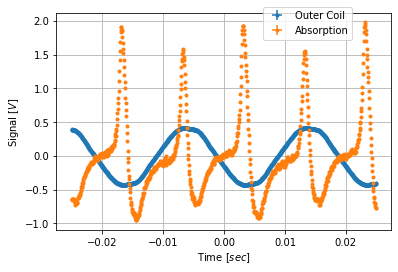

In [3]:
p = pd.read_csv("data/min_mod_1 0.csv", sep=',', header=1, usecols=[3,4,5])

t = p['Time (s)']
v1 = p['1 (VOLT)']
v2 = p['2 (VOLT)']

plt.errorbar(t, v1, 0.001, 0, '.', label='Outer Coil')
plt.errorbar(t, v2, 0.001, 0, '.', label='Absorption')
plt.xlabel(r'Time $\left[sec\right]$')
plt.ylabel(r'Signal $\left[V\right]$')
plt.legend(loc='upper center', bbox_to_anchor=(0.75,1.05))
plt.grid()
plt.show()

V_amp1 = np.max(v1)
V_amp2 = np.min(v1)

V_amp = (V_amp1 + -1*V_amp2)/2

I = V_amp/R 

K1_high = B_res / (mu_0*I)

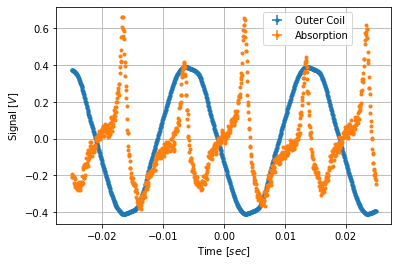

In [4]:
p = pd.read_csv("data/min_mod_2 0.csv", sep=',', header=1, usecols=[3,4,5])

t = p['Time (s)']
v1 = p['1 (VOLT)']
v2 = p['2 (VOLT)']

V_amp1 = ufloat(np.max(v1), 0.001)
V_amp2 = ufloat(np.min(v1), 0.001)

V_amp = (V_amp1 + -1*V_amp2)/2

I = V_amp/R 

K1_low = B_res / (mu_0*I)

plt.errorbar(t, v1, 0.001, 0, '.', label='Outer Coil')
plt.errorbar(t, v2, 0.001, 0, '.', label='Absorption')
plt.xlabel(r'Time $\left[sec\right]$')
plt.ylabel(r'Signal $\left[V\right]$')
plt.legend(loc='upper center', bbox_to_anchor=(0.75,1.00))
plt.grid()
plt.show()

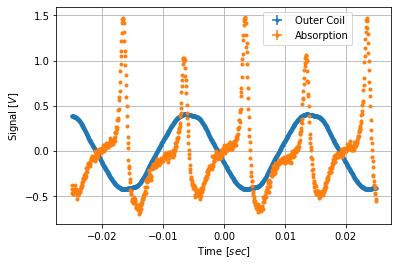

In [5]:

p = pd.read_csv("data/min_mod_3 0.csv", sep=',', header=1, usecols=[3,4,5])

t = p['Time (s)']
v1 = p['1 (VOLT)']
v2 = p['2 (VOLT)']

V_amp1 = np.max(v1)
V_amp2 = np.min(v1)

V_amp = (V_amp1 + -1*V_amp2)/2

I = V_amp/R 

K1_mid = B_res / (mu_0*I)

plt.errorbar(t, v1, 0.001, 0, '.', label='Outer Coil')
plt.errorbar(t, v2, 0.001, 0, '.', label='Absorption')
plt.xlabel(r'Time $\left[sec\right]$')
plt.ylabel(r'Signal $\left[V\right]$')
plt.legend(loc='upper center', bbox_to_anchor=(0.75,1.00))
plt.grid()
plt.show()

In [6]:
K1 = K1_low

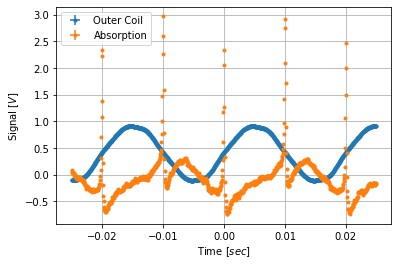

In [24]:

p = pd.read_csv("data/dc_1 0.csv", sep=',', header=1, usecols=[3,4,5])
t = p['Time (s)']
v1 = p['1 (VOLT)']
v2 = p['2 (VOLT)']

I = 0.5077 # A, multimeter
V = 11.85 # Volt, around (11.8-11.9)
# A = 0.495-0.52 from dc supply

K2_1 = B_res / (mu_0 * I)
K2 = K2_1
plt.errorbar(t, v1, 0.001, 0, '.', label='Outer Coil')
plt.errorbar(t, v2, 0.001, 0, '.', label='Absorption')
plt.xlabel(r'Time $\left[sec\right]$')
plt.ylabel(r'Signal $\left[V\right]$')
plt.legend()
plt.grid()
plt.show()

right = np.max(v1)
left = np.min(v1)

mid = (right + left) / 2

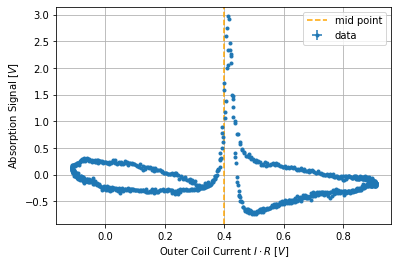

In [25]:
plt.errorbar(v1, v2, 0.001, 0.001, '.', label='data')
plt.xlabel(r'Outer Coil Current $I \cdot R$ $\left[V\right]$')
plt.ylabel(r'Absorption Signal $\left[V\right]$')
plt.axvline(mid, color='orange', linestyle='dashed', label='mid point')
plt.legend()
plt.grid()
plt.show()

In [26]:
deltav = np.abs(v1[np.argmax(v2)] - mid)
deltaI = deltav/R
K2_delta = np.abs(B_res / (mu_0 * (I+deltaI)) - K2)
K2_delta

197.60025265619697+/-0.2964619499984342

In [27]:
deltav

0.015452262232429015

In [28]:
v1[np.argmax(v2)]/R, mid/R

(0.5076506544051822+/-0.00015353062967772037,
 0.4886957345124721+/-0.00014779802446709896)

In [29]:
I

0.5077

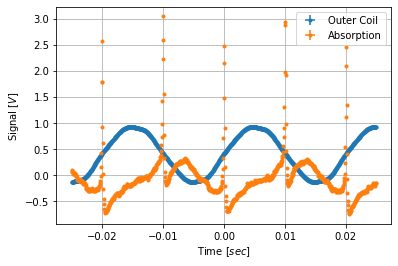

In [11]:
p = pd.read_csv("data/dc_2 0.csv", sep=',', header=1, usecols=[3,4,5])
t = p['Time (s)']
v1 = p['1 (VOLT)']
v2 = p['2 (VOLT)']

I = ufloat(0.5046, 0.0001) # A, multimeter
V = ufloat(11.8, 0.05) # Volt, around (11.75-11.85)
# A = 0.495-0.52 from dc supply

K2_2 = B_res / (mu_0 * I)

plt.errorbar(t, v1, 0.001, 0, '.', label='Outer Coil')
plt.errorbar(t, v2, 0.001, 0, '.', label='Absorption')
plt.xlabel(r'Time $\left[sec\right]$')
plt.ylabel(r'Signal $\left[V\right]$')
plt.legend()
plt.grid()
plt.show()

right = np.max(v1)
left = np.min(v1)

mid = (right + left) / 2


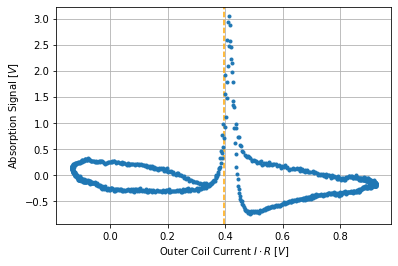

In [12]:
plt.errorbar(v1, v2, 0.001, 0.001, '.', label='')
plt.xlabel(r'Outer Coil Current $I \cdot R$ $\left[V\right]$')
plt.ylabel(r'Absorption Signal $\left[V\right]$')
plt.axvline(mid, color='orange', linestyle='dashed')
plt.grid()
plt.show()

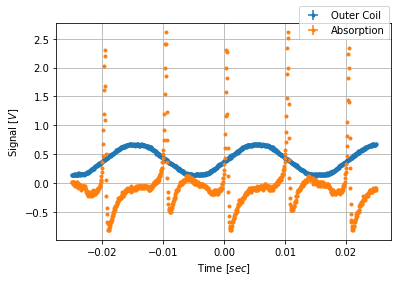

In [30]:

p = pd.read_csv("data/xy_1 0.csv", sep=',', header=1, usecols=[3,4,5])
t = p['Time (s)']
v1 = p['1 (VOLT)']
v2 = p['2 (VOLT)']

plt.errorbar(t, v1, 0.001, 0, '.', label='Outer Coil')
plt.errorbar(t, v2, 0.001, 0, '.', label='Absorption')
plt.xlabel(r'Time $\left[sec\right]$')
plt.ylabel(r'Signal $\left[V\right]$')
plt.legend(bbox_to_anchor=(0.71,0.9))
plt.grid()
plt.show()

I = ufloat(0.5200, 0.0001) # A, pm 0.0001
# power supply 0.513-0.527 A
V = ufloat(12.15, 0.01) # Volts, pm 0.01

K3 = B_res / (mu_0 * I)

right = np.max(v1)
left = np.min(v1)

mid = (right + left) / 2


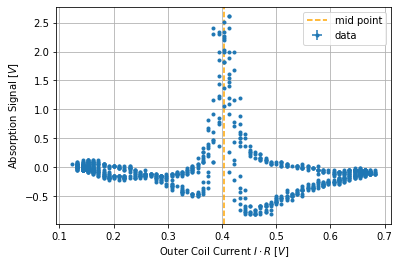

In [14]:
plt.errorbar(v1, v2, 0.001, 0.001, '.', label='data')
plt.xlabel(r'Outer Coil Current $I \cdot R$ $\left[V\right]$')
plt.ylabel(r'Absorption Signal $\left[V\right]$')
plt.axvline(mid, color='orange', linestyle='dashed', label='mid point')
plt.legend()
plt.grid()
plt.show()

In [15]:
c_ratio = 11.5 #pm 1
wavegen_freq = 1000 # hz
wavegen_ampl = 700 #mvpp

# from dc supply
I = np.array([              0.562,  0.558, 0.553,  0.547,  0.539, 0.534,  0.531,  0.527,  0.524, 0.524,  0.518, 0.516,  0.514,  0.511, 0.510, 0.506,  0.504, 0.498, 0.489, 0.485, ])
V = np.array([              13.55,  13.45, 13.33,  13.20,  13.00, 12.89,  12.80,  12.71,  12.65, 12.64,  12.5,  12.45,  12.4,   12.35, 12.30, 12.20,  12.15, 12.0,  11.8,  11.7,  ])

wavegen_ampl = np.array([   3.0,    3.0,   3.0,     2.66,  2.84,  2.9,    2.91,   3.0,    3.0,   3.0,    2.94,  3.0,    2.94,   3.0,   3.0,   2.96,   3.0,   2.94,  2.91,  2.94,  ])*1e-3 # for deltax, mv
phase = np.array([          180,    180,   180,    180,    180,   180,    180,    180,    180,   180,    0,     0,      0,      0,     0,     0,      0,     0,     0,     0,     ]) # for sign
avg_x = np.array([          458.02, 455.0, 450.63, 446.29, 439.8, 435.51, 432.91, 429.54, 427.62,427.06, 422.73,420.87, 419.65, 417.07,415.33,412.85, 410.4, 406.04,398.84,395.77,])*1e-3 # for dc I0, mV
pk_pk = np.array([          0.15,   0.18,  0.24,   0.29,   0.47,  0.60,   0.59,   0.51,   0.38,  0.33,   0.28,  0.42,   0.50,   0.56,  0.57,  0.53,   0.48,  0.37,  0.23,  0.19,  ]) # for deltay, V pm 0.01

phase[phase == 180] = -1
phase[phase == 0] = 1

I = unumpy.uarray(I, 0.001)
V = unumpy.uarray(V, 0.01)
wavegen_ampl = unumpy.uarray(wavegen_ampl, 0.01e-3)
phase = unumpy.uarray(phase, 0)
avg_x = unumpy.uarray(avg_x, 0.01e-3)
pk_pk = unumpy.uarray(pk_pk, 0.01)
dI = wavegen_ampl/R
df = pk_pk/dI * phase
I0 = avg_x/R

sort_ind = np.argsort(noms(I0))
I0 = np.take(I0, sort_ind)
df = np.take(df, sort_ind)

In [16]:
# d = {
#     'I':I,
#     'V':V,
#     'wavegen_ampl':wavegen_ampl,
#     'phase':phase,
#     'avg_x':avg_x,
#     'pk_pk':pk_pk
# }

# p = pd.DataFrame(d)

# p.to_csv('data/t1.csv')

In [17]:
v_res_2 = rf_v0 + (rf_v1 - rf_v0)/13 * c_ratio
omega = v_res_2*2*np.pi

H = K3 * I0
B = H*mu_0
v = B*g*mu/h
omega0 = v*2*np.pi

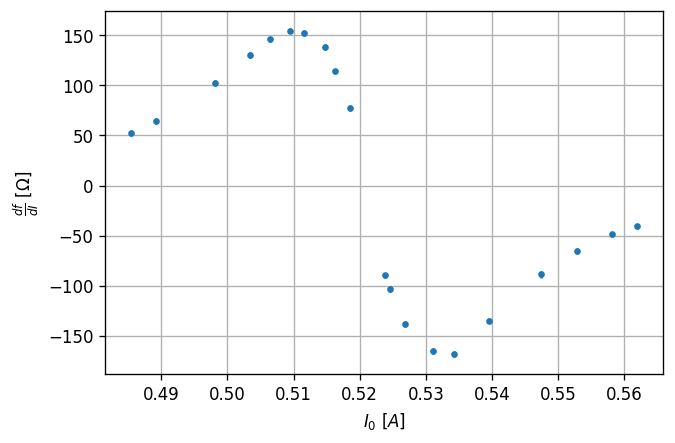

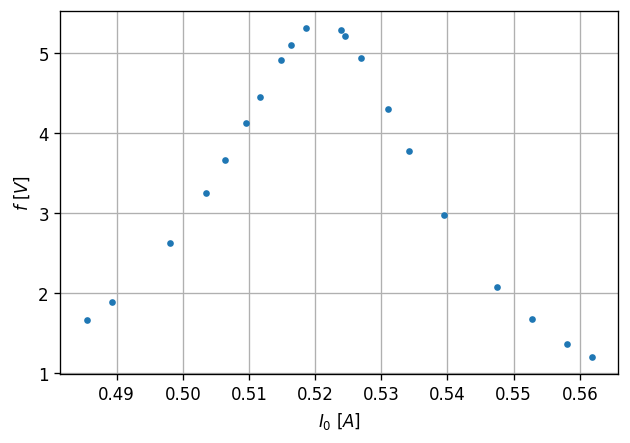

In [18]:
plt.figure(dpi=120)
plt.errorbar(noms(I0), noms(df), devs(df), devs(I0), '.')
plt.grid()
plt.xlabel(r'$I_{0}$ $\left[A\right]$')
plt.ylabel(r'$\frac{df}{dI}$ $\left[\Omega\right]$')
plt.show()

f = cumtrapz(noms(df), noms(I0), initial=0)
# f += -f[-1] + 1.2e9
f += -f[-1] + 1.2
plt.figure(dpi=120)
plt.errorbar(noms(I0), f, 0, devs(I0), '.')
plt.grid()
plt.xlabel(r'$I_{0}$ $\left[A\right]$')
plt.ylabel(r'$f$ $\left[V\right]$')
plt.show()

In [19]:
# def P(omega0, chi0, T2, H1, omega):
#     return omega*H1**2*chi0*omega0*T2 / (1 + (omega0-omega)**2*T2**2)

def P(omega0, A, T2, omega):
    return omega*A*omega0*T2 / (1 + (omega0-omega)**2*T2**2)

In [20]:
fit = curve_fit(P, noms(omega0), f, p0=(1,78e-9,np.median(noms(omega0))))

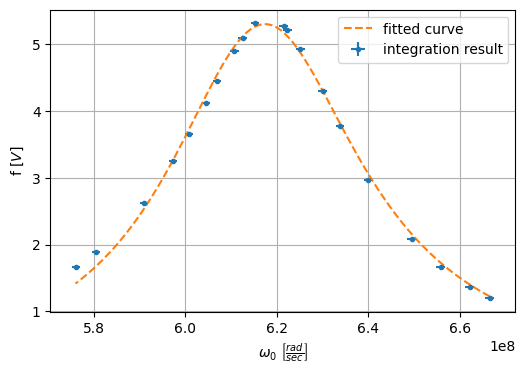

In [21]:
A, T2, omega = fit[0]
A = ufloat(A, np.sqrt(fit[1][0,0]))
T2 = ufloat(T2, np.sqrt(fit[1][1,1]))
omega = ufloat(omega, np.sqrt(fit[1][2,2]))

smooth_x = np.linspace(noms(omega0)[-1],noms(omega0)[0],100)

plt.figure(dpi=100)
plt.errorbar(noms(omega0), f, 0, devs(omega0), '.', label='integration result')
plt.plot(smooth_x, P(smooth_x, A.n, T2.n, omega.n), '--', label='fitted curve')
plt.xlabel(r'$\omega_{0}$ $\left[ \frac{rad}{sec} \right]$')
plt.ylabel(r'f $\left[V\right]$')
plt.legend()
plt.grid()
plt.show()

In [22]:
print(T2)

(3.86+/-0.07)e-08
